# <center> NVIDIA Trading Strategy with Python </center>

This project aims to process exploratory data analysis, build a trading strategy based on moving average and backtest the strategy.

In [48]:
import pandas_datareader as pdr
import pandas as pd
import statsmodels.api as sm
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
nvda = pdr.get_data_yahoo('NVDA', start = datetime.datetime(2000, 1, 1), end = datetime.datetime(2020, 10, 1))

## 1. Exploratory Data Analysis

In [3]:
nvda.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,3.968750,3.677083,3.937500,3.901042,7522800.0,3.587727
2000-01-04,3.843750,3.604167,3.833333,3.796875,7512000.0,3.491927
2000-01-05,3.750000,3.619792,3.687500,3.671875,4708800.0,3.376966
2000-01-06,3.671875,3.291667,3.671875,3.432292,3012000.0,3.156626
2000-01-07,3.526042,3.364583,3.416667,3.489583,1779600.0,3.209315


In [4]:
nvda.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-25,515.340027,489.829987,497.899994,514.950012,14700400.0,514.950012
2020-09-28,522.070007,510.000000,521.609985,521.400024,14345200.0,521.400024
2020-09-29,537.710022,517.330017,517.500000,529.030029,15536500.0,529.030029
2020-09-30,544.900024,526.010010,526.299988,541.219971,17206100.0,541.219971
2020-10-01,550.510010,538.429993,550.320007,544.580017,13125100.0,544.580017


In [5]:
nvda.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5221.000000,5221.000000,5221.000000,5221.000000,5.221000e+03,5221.000000
mean,53.959873,52.092096,53.045230,53.064503,1.627354e+07,52.069377
std,88.802818,85.758526,87.328483,87.382379,1.138795e+07,87.403811
min,2.626667,2.400000,2.433333,2.456667,1.141100e+06,2.259358
25%,11.096666,10.483334,10.750000,10.770000,9.182300e+06,9.905000
50%,15.900000,15.430000,15.680000,15.690000,1.365340e+07,14.581572
75%,30.799999,29.766666,30.400000,30.280001,1.990370e+07,28.123947
max,589.070007,556.000000,588.150024,573.859985,2.307714e+08,573.859985


In [9]:
nvda.to_csv('nvda_ohlc.csv')
df = pd.read_csv('nvda_ohlc.csv', header=0, index_col='Date', parse_dates=True)

In [10]:
nvda.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01'],
              dtype='datetime64[ns]', name='Date', length=5221, freq=None)

In [11]:
nvda.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [12]:
print(nvda.loc['2020'].head())

                  High         Low        Open       Close     Volume  \
Date                                                                    
2020-01-02  239.910004  236.720001  238.750000  239.910004  5938400.0   
2020-01-03  237.830002  234.100006  235.100006  236.070007  5134600.0   
2020-01-06  237.270004  231.270004  232.320007  237.059998  6565900.0   
2020-01-07  241.770004  236.389999  238.199997  239.929993  7871400.0   
2020-01-08  242.039993  238.149994  239.759995  240.380005  6927700.0   

             Adj Close  
Date                    
2020-01-02  239.585526  
2020-01-03  235.750748  
2020-01-06  236.739395  
2020-01-07  239.605499  
2020-01-08  240.054901  


In [14]:
sample = nvda.sample(20)
print(sample)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2013-02-06   12.440000   12.070000   12.140000   12.340000  13267200.0   
2011-10-21   14.830000   14.240000   14.590000   14.480000  15710700.0   
2008-03-31   20.260000   19.540001   19.889999   19.790001  14249800.0   
2004-08-13    3.523333    3.410000    3.440000    3.500000  20392500.0   
2005-11-04   11.583333   11.233334   11.556666   11.353333  14256900.0   
2008-07-17   11.500000   10.920000   11.500000   11.360000  21552000.0   
2005-01-07    7.560000    7.233333    7.503334    7.343333  19077300.0   
2003-08-29    6.083333    5.943333    5.966667    6.056667  13322100.0   
2012-08-01   13.750000   13.330000   13.620000   13.390000   8397800.0   
2017-03-20  109.610001  106.129997  106.779999  109.449997  18714200.0   
2009-12-15   15.910000   15.520000   15.560000   15.650000  11153800.0   
2012-10-16   13.200000   12.780000   1

In [15]:
monthly_nvda = nvda.resample('M').mean()
print(monthly_nvda)

                  High         Low        Open       Close        Volume  \
Date                                                                       
2000-01-31    3.664844    3.429427    3.589844    3.544271  6.176820e+06   
2000-02-29    4.508854    4.177604    4.323958    4.406510  1.145106e+07   
2000-03-31    8.179348    6.963259    7.495301    7.481714  1.907843e+07   
2000-04-30    7.503015    6.515625    7.013912    6.984855  8.528589e+06   
2000-05-31    8.394413    7.618608    7.964844    8.020005  9.881345e+06   
...                ...         ...         ...         ...           ...   
2020-06-30  369.770910  357.829544  364.403635  364.630003  1.104307e+07   
2020-07-31  414.837272  401.867727  408.273636  409.061363  9.199195e+06   
2020-08-31  484.798569  469.508094  475.982856  479.002857  1.151590e+07   
2020-09-30  524.291908  497.423811  512.724288  510.918100  1.887710e+07   
2020-10-31  550.510010  538.429993  550.320007  544.580017  1.312510e+07   

           

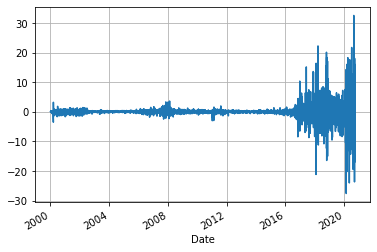

In [19]:
# Show Diff plot
nvda['diff'] = nvda.Open - nvda.Close
nvda['diff'].plot(grid = True)
plt.show()

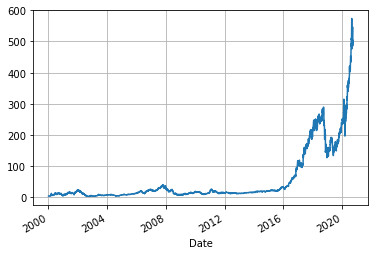

In [20]:
# Show Close plot
nvda['Close'].plot(grid = True)
plt.show()

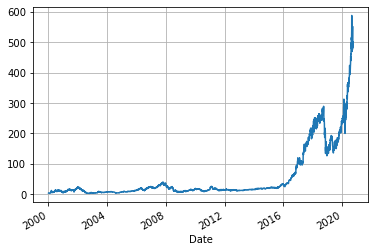

In [21]:
# Show Open plot
nvda['Open'].plot(grid = True)
plt.show()

In [24]:
# Compute daily percentage change and daily log returns
daily_close = nvda[['Adj Close']]
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace = True)
daily_log_returns = np.log(daily_close.pct_change() + 1)
print(daily_pct_change)
print(daily_log_returns)

            Adj Close
Date                 
2000-01-03   0.000000
2000-01-04  -0.026702
2000-01-05  -0.032922
2000-01-06  -0.065248
2000-01-07   0.016692
...               ...
2020-09-25   0.042578
2020-09-28   0.012526
2020-09-29   0.014634
2020-09-30   0.023042
2020-10-01   0.006208

[5221 rows x 1 columns]
            Adj Close
Date                 
2000-01-03        NaN
2000-01-04  -0.027065
2000-01-05  -0.033476
2000-01-06  -0.067474
2000-01-07   0.016554
...               ...
2020-09-25   0.041696
2020-09-28   0.012448
2020-09-29   0.014528
2020-09-30   0.022781
2020-10-01   0.006189

[5221 rows x 1 columns]


In [27]:
monthly = nvda.resample('BM').apply(lambda x: x[-1])
monthly.pct_change()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,0.687296,0.725000,0.607321,0.726813,0.677895,0.726812,-8.250031
2000-03-31,0.357143,0.300207,0.323758,0.320068,2.146487,0.320068,0.258621
2000-04-28,0.092461,0.135350,0.156598,0.054929,-0.814076,0.054929,-1.726027
2000-05-31,0.208333,0.228611,0.184584,0.280505,1.622520,0.280505,-2.396228
...,...,...,...,...,...,...,...
2020-06-30,0.073320,0.092104,0.088784,0.070109,-0.506794,0.070597,-0.427569
2020-07-31,0.130193,0.125884,0.134126,0.117607,0.050004,0.117607,-0.719728
2020-08-31,0.260855,0.249665,0.247982,0.259992,0.296546,0.259992,2.723297


In [28]:
quarter = nvda.resample("4M").mean()
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,0.967005,0.857569,0.881505,0.912416,1.018410,0.912416,-1.522449
2000-09-30,0.663790,0.739965,0.702476,0.705249,-0.233304,0.705249,1.491818
2001-01-31,-0.209175,-0.234756,-0.218162,-0.224624,0.329474,-0.224624,-1.477082
2001-05-31,0.229525,0.263598,0.236995,0.250598,1.363793,0.250598,-4.070197
...,...,...,...,...,...,...,...
2019-09-30,-0.021079,-0.018745,-0.020353,-0.019798,-0.273575,-0.018215,-0.580333
2020-01-31,0.321161,0.326568,0.322418,0.325307,-0.156802,0.326780,-6.487761
2020-05-31,0.300613,0.264833,0.281032,0.284449,0.926299,0.285481,2.225791


In [29]:
daily_pct_change = daily_close / daily_close.shift(1) - 1
print(daily_pct_change)

            Adj Close
Date                 
2000-01-03        NaN
2000-01-04  -0.026702
2000-01-05  -0.032922
2000-01-06  -0.065248
2000-01-07   0.016692
...               ...
2020-09-25   0.042578
2020-09-28   0.012526
2020-09-29   0.014634
2020-09-30   0.023042
2020-10-01   0.006208

[5221 rows x 1 columns]


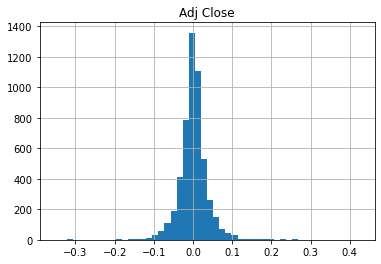

         Adj Close
count  5220.000000
mean      0.001691
std       0.038288
min      -0.352335
25%      -0.015815
50%       0.000951
75%       0.017497
max       0.424145


In [31]:
daily_pct_change.hist(bins = 50)
plt.show()
print(daily_pct_change.describe())

             Adj Close
Date                  
2000-01-03         NaN
2000-01-04    0.973298
2000-01-05    0.941255
2000-01-06    0.879840
2000-01-07    0.894526
...                ...
2020-09-25  143.530988
2020-09-28  145.328787
2020-09-29  147.455483
2020-09-30  150.853161
2020-10-01  151.789700

[5221 rows x 1 columns]


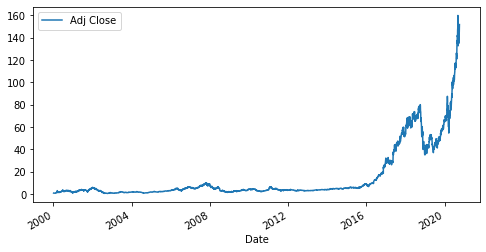

In [37]:
cum_daily_return = (1 + daily_pct_change).cumprod()
print(cum_daily_return)
cum_daily_return.plot(figsize = (8, 4))
plt.show()

             Adj Close
Date                  
2000-01-31    0.903731
2000-02-29    1.129573
2000-03-31    1.917876
2000-04-30    1.790510
2000-05-31    2.055862
...                ...
2020-06-30  101.596093
2020-07-31  113.982755
2020-08-31  133.471576
2020-09-30  142.407181
2020-10-31  151.789700

[250 rows x 1 columns]


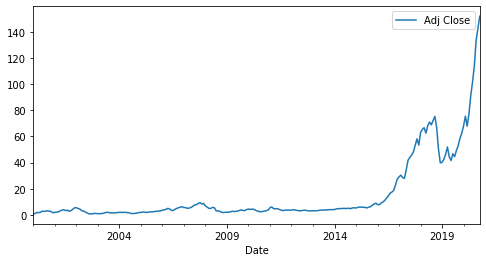

In [38]:
cum_monthly_return = cum_daily_return.resample("M").mean()
print(cum_monthly_return)
cum_monthly_return.plot(figsize = (8, 4))
plt.show()

In [41]:
# Compare NVIDIA stock with AMD, INTEL and IBM
def get(tickers, startdate, enddate) : 
    def data(ticker) : 
        return (pdr.get_data_yahoo(ticker, start = startdate, end = enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys = tickers, names = ['Ticker', 'Date']))
tickers = ['NVDA', 'INTC', 'AMD', 'IBM']
all_data = get(tickers, datetime.datetime(2010, 1, 1), datetime.datetime(2020, 1, 1))

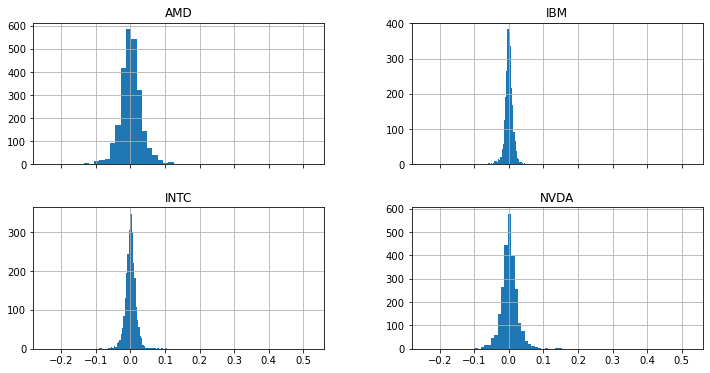

In [43]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.hist(bins = 50, sharex = True, figsize = (12, 6))
plt.show()

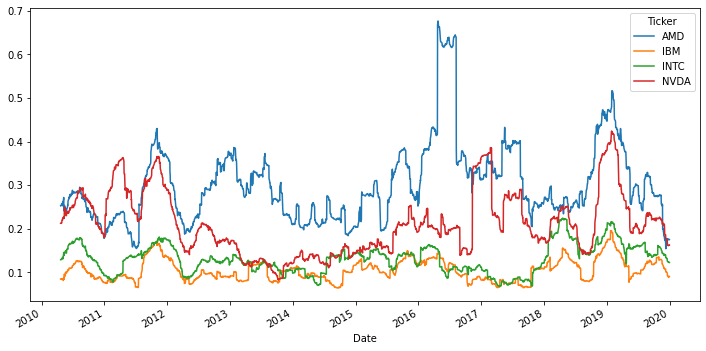

In [44]:
# Plot volatility
min_periods = 75
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)
vol.plot(figsize = (12, 6))
plt.show()

In [51]:
# Process OLS Regression
all_adj_close = all_data[['Adj Close']]
all_returns = np.log(all_adj_close / all_adj_close.shift(1))
nvda_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'NVDA']
nvda_returns.index = nvda_returns.index.droplevel('Ticker')
amd_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AMD']
amd_returns.index = amd_returns.index.droplevel('Ticker')
return_data = pd.concat([nvda_returns, amd_returns], axis = 1)[1:]
return_data.columns = ['NVDA', 'AMD']
X = sm.add_constant(return_data['NVDA'])
model = sm.OLS(return_data['AMD'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    AMD   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     707.3
Date:                Sat, 17 Oct 2020   Prob (F-statistic):          1.61e-137
Time:                        17:06:19   Log-Likelihood:                 5128.7
No. Observations:                2515   AIC:                        -1.025e+04
Df Residuals:                    2513   BIC:                        -1.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.009e-05      0.001     -0.111      0.9

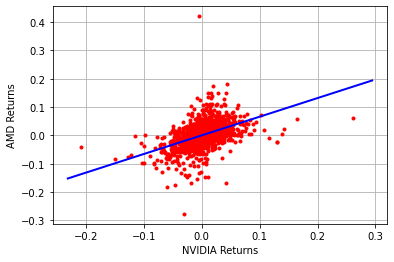

In [52]:
# Plot the OLS Regression
plt.plot(return_data['NVDA'], return_data['AMD'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw = 2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('NVIDIA Returns')
plt.ylabel('AMD Returns')
plt.show()

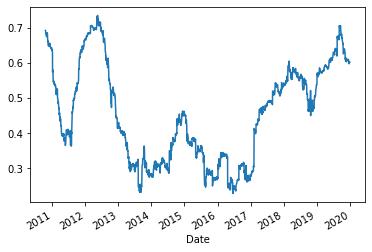

In [59]:
# Check the OLS results with rolling correlation
return_data['AMD'].rolling(window = 252).corr(return_data['NVDA']).plot()
plt.show()

## 2. Build a trading strategy

In [62]:
# Create signals
short_window = 40
long_window = 100
signals = pd.DataFrame(index = nvda.index)
signals['signal'] = 0.0
signals['short_mavg'] = nvda['Close'].rolling(window = short_window, min_periods = 1, center = False).mean()
signals['long_mavg'] = nvda['Close'].rolling(window = long_window, min_periods = 1, center = False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2000-01-03     0.0    3.901042    3.901042        NaN
2000-01-04     0.0    3.848958    3.848958        0.0
2000-01-05     0.0    3.789931    3.789931        0.0
2000-01-06     0.0    3.700521    3.700521        0.0
2000-01-07     0.0    3.658333    3.658333        0.0
...            ...         ...         ...        ...
2020-09-25     1.0  490.532001  418.971401        0.0
2020-09-28     1.0  492.952252  421.207502        0.0
2020-09-29     1.0  495.167753  423.449102        0.0
2020-09-30     1.0  497.470502  425.736302        0.0
2020-10-01     1.0  499.798253  427.955902        0.0

[5221 rows x 4 columns]


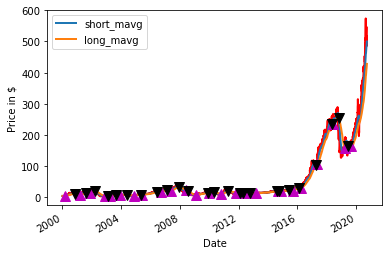

In [64]:
# Plot buy and sell signals
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel = 'Price in $')
nvda['Close'].plot(ax = ax1, color = 'r', lw = 2.)
signals[['short_mavg', 'long_mavg']].plot(ax = ax1, lw = 2.)
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize = 10, color = 'm')
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize = 10, color = 'k')
plt.show()

## 3. Backtest the trading strategy

In [66]:
# Backtest the portfolio returns
initial_capital = float(100000.0)
positions = pd.DataFrame(index = signals.index).fillna(0.0)
positions['NVDA'] = 100 * signals['signal']
portfolio = positions.multiply(nvda['Adj Close'], axis = 0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(nvda['Adj Close'], axis = 0)).sum(axis = 1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(nvda['Adj Close'], axis = 0)).sum(axis = 1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
print(portfolio.head())
print(portfolio.tail())

            NVDA  holdings      cash     total  returns
Date                                                   
2000-01-03   0.0       0.0  100000.0  100000.0      NaN
2000-01-04   0.0       0.0  100000.0  100000.0      0.0
2000-01-05   0.0       0.0  100000.0  100000.0      0.0
2000-01-06   0.0       0.0  100000.0  100000.0      0.0
2000-01-07   0.0       0.0  100000.0  100000.0      0.0
                    NVDA      holdings          cash          total   returns
Date                                                                         
2020-09-25  51495.001221  51495.001221  95677.210975  147172.212195  0.014497
2020-09-28  52140.002441  52140.002441  95677.210975  147817.213416  0.004383
2020-09-29  52903.002930  52903.002930  95677.210975  148580.213904  0.005162
2020-09-30  54121.997070  54121.997070  95677.210975  149799.208045  0.008204
2020-10-01  54458.001709  54458.001709  95677.210975  150135.212684  0.002243


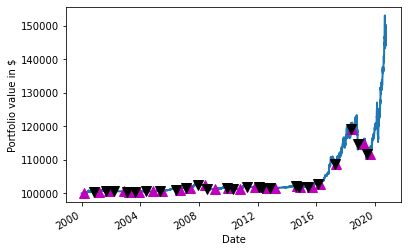

In [67]:
# Plot the backtest results
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel = 'Portfolio value in $')
portfolio['total'].plot(ax = ax1, lw = 2.)
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize = 10, color = 'm')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize = 10, color = 'k')
plt.show()

In [70]:
# Compute Sharpe Ratio on the portfolio
returns = portfolio['returns']
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())
print('The Sharpe Ratio of the portfolio is :', sharpe_ratio)

The Sharpe Ratio of the portfolio is : 0.5526842638922798


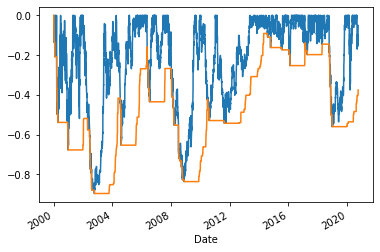

In [72]:
# Compute the maximum drawdown
window = 252
rolling_max = nvda['Adj Close'].rolling(window, min_periods = 1).max()
daily_drawdown = nvda['Adj Close'] / rolling_max - 1.0
max_daily_drawdown = daily_drawdown.rolling(window, min_periods = 1).min()
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()

In [73]:
#Compute the Compound Annual Growth Rate (CAGR)
days = (nvda.index[-1] - nvda.index[0]).days
cagr = ((((nvda['Adj Close'][-1]) / nvda['Adj Close'][1])) ** (365.0 / days)) - 1
print('The Compound Annual Growth Rate (CAGR) of the portfolio is:', cagr)

The Compound Annual Growth Rate (CAGR) of the portfolio is: 0.275384839897288
